# Analyse and Plot an N-Tuple on a `parquet` file with ROOT

In [8]:
import ROOT
import pandas as pd
import math

Read the file (as Pandas data frane) and create a RDataFrame instance from it 

In [9]:
pdf = pd.read_parquet('m_H-recoil.parquet') # engine='pyarrow'
rdf = ROOT.RDF.FromPandas(pdf)
rdf.Display().Print()

+-----+-----------+---------+----------------+-----------------+
| Row | Zcand_m   | Zcand_q | Zcand_recoil_m | Zcand_recoil_θ | 
+-----+-----------+---------+----------------+-----------------+
| 0   | 91.908974 | 0       | 126.734734     | 0.821837        | 
+-----+-----------+---------+----------------+-----------------+
| 1   | 85.086327 | 0       | 122.906647     | 3.089097        | 
+-----+-----------+---------+----------------+-----------------+
| 2   | 87.566803 | 0       | 130.802719     | 0.751495        | 
+-----+-----------+---------+----------------+-----------------+
| 3   | 91.418938 | 0       | 139.848434     | 1.147000        | 
+-----+-----------+---------+----------------+-----------------+
| 4   | 89.760010 | 0       | 143.035431     | 2.027377        | 
+-----+-----------+---------+----------------+-----------------+


## Create the histograms and draw them

In [10]:
# Draw the histograms
h1 = rdf.Histo1D(("Zcand_m", "Z candidate mass;[GeV];N_{Events}", 100, 80, 100), "Zcand_m")
h2 = rdf.Histo1D(("Zcand_recoil_m", "Z candidate recoil mass;[GeV];N_{Events}", 100, 120, 140), "Zcand_recoil_m")
h3 = rdf.Histo1D(("Zcand_recoil_theta", "Z candiadte recoil #theta;[rad];N_{Events}",100,0,math.pi), "Zcand_recoil_θ")
c1 = ROOT.TCanvas()
h1.Fit('gaus')
h1.Draw()
c2 = ROOT.TCanvas()
h2.Draw()
c3 = ROOT.TCanvas()
h3.Draw()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      860.398
NDf                       =           97
Edm                       =  7.29944e-07
NCalls                    =           92
Constant                  =      160.987   +/-   4.60763     
Mean                      =      90.9986   +/-   0.032612    
Sigma                     =      2.05567   +/-   0.0494044    	 (limited)


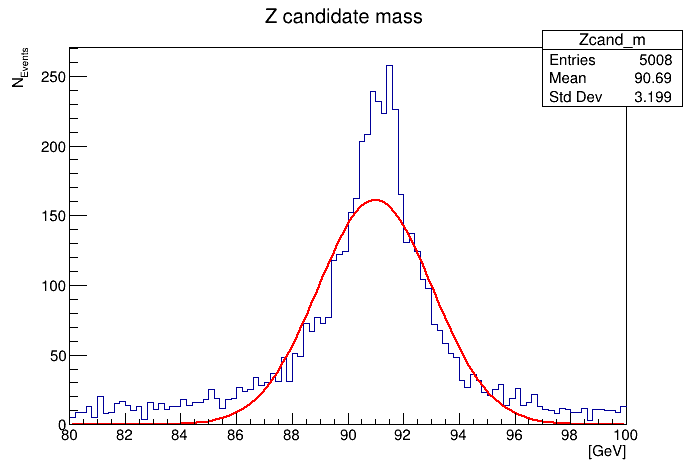

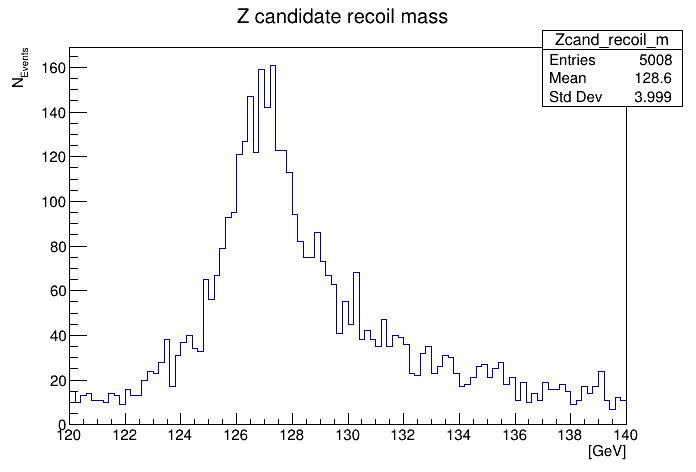

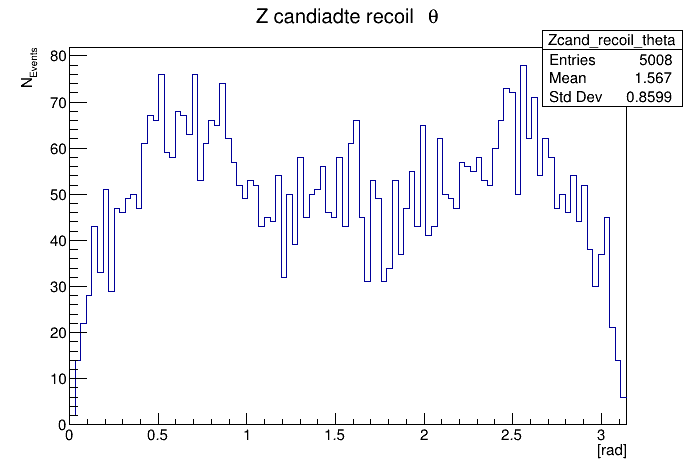

In [11]:
ROOT.gROOT.GetListOfCanvases().Draw()